In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('salary_data.csv')

# Prepare the independent (X) and dependent (y) variables
X = data[['YearsExperience']].values  # Independent variable (2D array)
y = data['Salary'].values  # Dependent variable (1D array)

data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [2]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [3]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [4]:
# Test the model
y_pred = model.predict(X_test)
print(y_pred)

[ 40422.17131541 100425.19976867  70423.68554204  77924.0640987
  52089.42684799  61256.55619502]


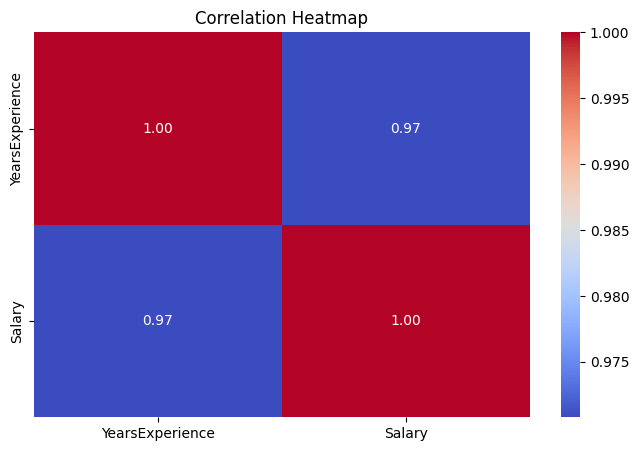

In [5]:
# Heatmap to visualize correlation
plt.figure(figsize=(8, 5))
correlation = data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [6]:
correlation = data.corr()
print(correlation)

                 YearsExperience    Salary
YearsExperience         1.000000  0.970803
Salary                  0.970803  1.000000


In [7]:
# Directly calculate R² score using the score method
accuracy = model.score(X_test, y_test)
print(f"Accuracy (R² Score): {accuracy:.4f}")

Accuracy (R² Score): 0.9326


In [8]:
# Function to predict salary based on user input
def predict_salary():
    years_exp = float(input("Enter years of experience: "))
    salary_pred = model.predict([[years_exp]])  # Predict salary
    print(f"Predicted Salary for {years_exp} years of experience: {salary_pred[0]:.2f}")

# Call the prediction function
predict_salary()


Predicted Salary for 7.5 years of experience: 90424.70


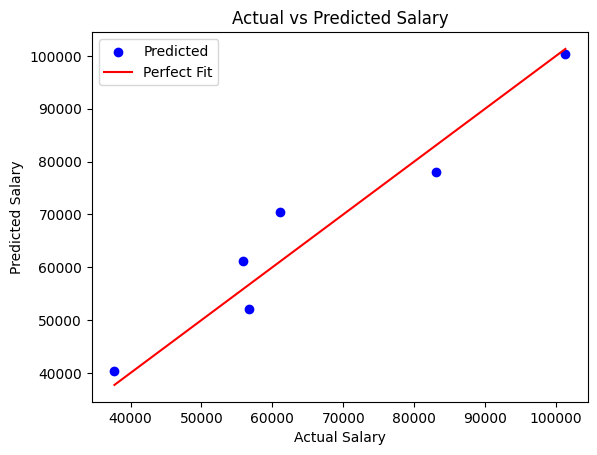

In [9]:
# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Perfect Fit')
plt.title('Actual vs Predicted Salary')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.legend()
plt.show()